<a href="https://colab.research.google.com/github/megghan/python_UFSCar/blob/main/Semanas_2_e_3_Complexidade_de_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Uma breve introdução à Complexidade de Algoritmos</font>

## Conteúdo:

* Importância da análise de complexidade
* Função de contagem de atribuições:~> $T : \mathbb{N} \to \mathbb{N}$
* Comparação entre complexidades
* Notação O-grande (Big - O): $\mathcal{O}$
* Exemplos recorrentes

## Bibliografias

* Apostila do professor Alexandre Levada: https://ava2.ead.ufscar.br/pluginfile.php/594948/mod_resource/content/3/Complexidade.pdf.
* Livro de notas de aula "[Análise de Algoritmos e Estruturas de Dados](https://www.ime.usp.br/~mota/livros/livro_AAED.pdf)" (2020), dos professores Lintzmayer, C. N. & Mota, G. O..

# Importância da análise de complexidade

O conceito de complexidade de um algoritmo está diretamente associado a sua eficiência em solucionar um problema. Tendo em vista que um problema pode ser solucionado por vários algoritmos diferentes, então podemos estabelecer propriedades a cada um desses  algoritmos a fim de compará-los e definir qual é mais ou menos apropriado na resolução de um problema.

Uma dessas propriedades pode ser o uso de recursos computacionais (memória e processamento) utilizado pelo algoritmo. Dessa forma, quanto **mais recursos computacionais** um algoritmo demanda **maior é sua complexidade computacional**.

Como exemplo, vamos supor que o tempo computacional que um algoritmo necessita para solucionar um problema seja utilizado para definir sua complexidade computacional. Sendo assim, quanto mais tempo um algoritmo leva para solucionar um problema, maior é sua complexidade.

In [ ]:
def algoritmo_de_ordem_n(n):

    print("Começo do algoritmo")

    x = 0
    for i in range(n): # varredura em n elementos
        x = x + i

    return x

In [ ]:
def algoritmo_de_ordem_n_cubica(n):

    x = 0
    for i in range(n): # varredura em n elementos
        for j in range(n):
          for k in range(n):
              x = x + i

    x = x / (n ** 2)

    return x

In [ ]:
from time import time # pacote para contabilizar tempo gasto em processamento

n = 300

# Execução do algoritmo de n + 1 atribuições -----------------------------------
tempo_inicial_do_algoritmo_de_ordem_n = time() # Tempo atual antes do algoritmo ser executado

soma_ordem_n = algoritmo_de_ordem_n(n) # Execução do algoritmo

tempo_final_do_algoritmo_de_ordem_n   = time() # Tempo atual após o algoritmo ter sido finalizado
#-------------------------------------------------------------------------------


# Execução do algoritmo de n³ + 2 atribuições -----------------------------------
tempo_inicial_do_algoritmo_de_ordem_n_cubica = time()

soma_ordem_n_cub = algoritmo_de_ordem_n_cubica(n)

tempo_final_do_algoritmo_de_ordem_n_cubica   = time()
#-------------------------------------------------------------------------------

print("soma_ordem_n = ", soma_ordem_n)
print("soma_ordem_n_cub = ", soma_ordem_n_cub)

tempo_final_n = tempo_final_do_algoritmo_de_ordem_n - tempo_inicial_do_algoritmo_de_ordem_n
print("Tempo gasto em n + 1 atribuições: ", tempo_final_n, " segundo(s)")

tempo_final_n_cub = tempo_final_do_algoritmo_de_ordem_n_cubica - tempo_inicial_do_algoritmo_de_ordem_n_cubica
print("Tempo gasto em n³ + 2 atribuições: ", tempo_final_n_cub, " segundo(s)")

print("O algoritmo com n³+2 atribuições demora ", tempo_final_n_cub/tempo_final_n, "vezes o tempo do algoritmo de n+1 atribuições")

Começo do algoritmo
soma_ordem_n =  44850
soma_ordem_n_cub =  44850.0
Tempo gasto em n + 1 atribuições:  0.00022721290588378906  segundo(s)
Tempo gasto em n³ + 2 atribuições:  1.624635934829712  segundo(s)
O algoritmo com n³+2 atribuições demora  7150.280167890871 vezes o tempo do algoritmo de n+1 atribuições


**Importante:** Tempo computacional depende da máquina. Assim, esta não é uma boa propriedade para mensuração de eficiência de um dado algoritmo. Dessa forma, vamos utilizar outra propriedade para determinar a complexidade de um algoritmo: a quantidade de atribuições em seu código.

## **A função de contagem de atribuições**

**<font color='blue'>Definição 1</font>**: Seja $\mathbf{A}$ um algoritmo que dependa de um número natural $n$. Então define-se como função de contagem de atribuições de $\mathbf{A}$ a função $T_\mathbf{A}:\mathbb{N}\to\mathbb{N}$, tal que $T_\mathbf{A}(n)$ seja a quantidade total de atribuições de variáveis efetuadas em $\mathbf{A}$.

**Exemplo 1**: Considere o algoritmo que some os valores inteiros de $1$ até um número natural $n$:



```python
def soma_1_ate_n(n):

    x = 0 # 1 atribuição

    for i in range(1, n+1): # varredura em n elementos
        x = x + i # 1 atribuição

    return x
```

**Fato**: O número total de atribuições efetuadas no algoritmo definido na função ```soma_1_ate_n(n)``` é exatamente igual a $n+1$. Assim, a função $T$ associada a este algoritmo é

$$T(n) = n + 1.$$




# Comparação entre complexidades

**Exemplo 2**: Considere dois algoritmos $A$ e $B$ que somam **$n$ vezes** os valores inteiros de $1$ até um número natural $n$:






In [ ]:
def A(n):

    x = 0 # 1 atribuição

    for i in range(1,n+1): # varredura em n elementos
        for j in range(1,n+1): # varredura em n elementos
            x = x + j # 1 atribuição

    return x

def B(n):

    x = 0 # 1 atribuição

    for i in range(1,n+1): # varredura em n elementos
          x = x + (i * n) # 1 atribuição

    return x


**Fato**: O número total de atribuições efetuadas no algoritmo definido na função ```A(n)``` é exatamente igual a $n^2+1$. Assim, a função $T_A$ associada a este algoritmo é

$$T_A(n) = n^2 + 1.$$

Ao mesmo tempo, o número total de atribuições feitas no algoritmo definido na função ```B(n)``` é exatamente igual a $n+1$. Dessa forma, a função $T_B$ associada a este algoritmo é

$$T_B(n) = n + 1.$$

In [ ]:
from time import time # pacote para contabilizar tempo gasto em processamento

n = 30000

# Avaliação de A
tick    = time()
soma_A  = A(n)
tack    = time()

Tempo_A = tack - tick

# Avaliação de B
tick    = time()
soma_B  = B(n)
tack    = time()

Tempo_B = tack - tick

print("Soma obtida por A = ", soma_A,", soma obtida por B = ", soma_B)
print("Tempo gasto por A = ", Tempo_A, "s , tempo gasto por B = ", Tempo_B, "s")
print("Tempo A / Tempo B = ", (Tempo_A / Tempo_B))

Soma obtida por A =  13500450000000 , soma obtida por B =  13500450000000
Tempo gasto por A =  63.6441388130188 s , tempo gasto por B =  0.0032701492309570312 s
Tempo A / Tempo B =  19462.151210265383


**Fato**: Quanto maior o valor de $n$ maior é a diferença entre o número de atribuições necessárias para a execução dos algoritmos ```A``` e ```B```. Na verdade, se considerarmos que $n$ tende ao infinito, teremos:

<br/>
$$\lim_{n\to+∞} \frac{T_B(n)}{T_A(n)} = \lim_{n\to+∞} \frac{n + 1}{n^2 + 1} = \lim_{n\to+∞} \frac{n/n + 1/n}{n^2/n + 1/n} = \lim_{n\to+∞} \frac{1 + 1/n}{n + 1/n} = \lim_{n\to+∞} \frac{1}{n} = 0.$$
<br/>

Do mesmo modo, é fácil comprovar que $$ \lim_{n\to+∞} \frac{T_A(n)}{T_B(n)} = +∞.$$

## <font color='blue'>**Definição 2**</font>: Sejam ```A``` e ```B``` dois algoritmos dedicados a solucionar o mesmo problema, sendo dependentes da mesma parametrização $n \in \mathbb{N}$ e resultando na mesma estrutura e nos mesmos valores. Além disso, $T_A$ e $T_B$ são, respectivamente, as funções que contabilizam o número total de atribuições que os algoritmos ```A``` e ```B``` efetuam.

##Então dizemos que ```A``` **é mais complexo** (ou menos eficiente) **que** ```B``` se, e somente se,

##$$ \lim_{n\to+∞} \frac{T_A(n)}{T_B(n)} = +∞.$$

<br/>

##Do mesmo modo, dizemos que ```A``` **é menos complexo** (ou mais eficiente) **que** ```B``` se, e somente se,

##$$ \lim_{n\to+∞} \frac{T_A(n)}{T_B(n)} = 0.$$

### **Propriedade 1**: Considere ```A``` e ```B``` dois algoritmos que solucionam o mesmo problema e $T_A(n)$ e $T_B(n)$ suas respectivas quantidades de atribuições. Então as implicações a seguir são válidas:

###(a) Se ```A``` é mais complexo que ```B```, então $\lim_{n\to +∞} \frac{T_B(n)}{T_A(n)} = 0.$

###(a) Se ```A``` é menos complexo que ```B```, então $\lim_{n\to +∞} \frac{T_B(n)}{T_A(n)} = +∞.$

### **Demonstração**: Decorrente da definição.

### **Exemplo 3**: Para ordenar os elementos de uma lista numérica de $n$ elementos, o algoritmo conhecido como *Quick Sort* necessita realizar aproximadamente $n^2$ atribuições, enquanto que o algoritmo conhecido como *Merge Sort* realiza aproximadamente $n\cdot \log(n)$ atribuições. Qual algoritmo é mais eficiente para solucionar o problema em questão?

**Solução**: Considere:

* Número de atribuições do Quick Sort: $T_{Q}(n) = n^2$.
* Número de atribuições do Merge Sort: $T_{M}(n) = n\cdot \log(n)$.

Vamos avaliar o comportamento destas duas funções quando $n$ assume valores muito grandes:

$$\lim_{n\to +∞} \frac{n\cdot \log(n)} {n^2} = \lim_{n\to +∞} \frac{\log(n)} {n} = \frac{+∞}{+∞}$$

Aplicar L'Hospital

$$\lim_{n\to +∞} \frac{n\cdot \log(n)} {n^2} = \lim_{n\to +∞} \frac{\log(n)} {n} = \lim_{n\to +∞} \frac{1/n} {1} = \lim_{n\to +∞} \frac{1} {n} = 0.$$

Assim, o algoritmo Merge Sort é mais eficiente (ou menos complexo) que o algoritmo Quick Sort.

# Notação O-grande (Big-O): $\mathcal{O}$



<font color = "blue">**Definição 3**:</font> Suponha que ```A``` e ```B``` são dois algoritmos dedicados a solucionar o mesmo problema e a quantidade de atribuições conduzidas durante seus respectivos processos são dependentes de um valor natural $n$ e determinadas pelas funções contínuas $T_A$ e $T_B$. Se nem ```A``` é mais eficiente que ```B``` e nem ```B``` é mais eficiente que ```A```, então dizemos que ```A``` **é de mesma ordem de complexidade que** ```B```, ou ainda que $T_A(n)$ **é da ordem de complexidade** $T_B(n)$, e utilizamos a seguinte notação: $$T_A(n) = \mathcal{O}(T_B(n)).$$

**Nota**: Uma forma alternativa de dizer que dois algoritmos ```A``` e ```B``` possuem a mesma complexidade é quando os limites de suas quantidades de atribuições $T_A(n)$ e $T_B(n)$ (Definição 2) existem e são diferentes de 0.

Neste caso, temos que

$$T_A(n) = \mathcal{O}(T_B(n))\quad ⟺ \quad∃ C, n_0 \quad| \quad∀n\geq n_0, \quad  C\cdot T_B(n) \geq T_A(n).$$

### **Exemplo 4**: Mostre que um algoritmo que possua total de atribuições $T(n)=3n^2+2n+10$ é da ordem de complexidade $n^2$.

**Solução**: Vamos mostrar que nenhum dos algoritmos em questão é mais eficiente. Para isso, vamos calcular o resultado do limite de $\frac{T(n)}{n^2}$ quando $n$ tende ao infinito.

$$\lim_{n \to +∞} \frac{T(n)}{n^2} = \lim_{n \to +∞} \frac{3n^2+2n+10}{n^2} = \lim_{n \to +∞} \frac{3n^2/n^2+2n/n^2+10/n^2}{n^2/n^2} = \lim_{n \to +∞} \frac{3+2/n+10/n^2}{1} = 3. $$

Como $\lim_{n \to +∞} \frac{T(n)}{n^2}$ é um resultado finito e diferente de $0$, então nenhum dos algoritmos considerados pode ser dito mais eficiente. Sendo assim, $T(n) = \mathcal{O}(n^2)$, ou seja, $T(n)$ é da ordem de $n^2$.

**Solução alternativa**: Vamos mostrar que existe uma constante $C$ e um valor natural $n_0$ tais que, para qualquer $n \geq n_0$, temos que $$T(n) \leq Cn^2.$$

De fato, existem $C = 4$ e $n_0 = 5$ tais que a desigualdade acima é verdadeira para qualquer $n \geq n_0$, uma vez que

$$3n^2 + 2n + 10 \leq 4n^2 ⟺ -n^2 + 2n + 10 \leq 0$$

e $(-n^2 + 2n + 10)$ é um valor negativo para todo $n\geq 5$.

<font color='blue'>**Nomenclatura**</font>: É muito comum associarmos a complexidade de um algoritmo ao termo **dominante**, ou que possui **maior taxa de crescimento**, de sua quantidade total de atribuições. Por exemplo, se o algoritmo ```A``` possui quantidade total de atribuição $T_A(n)$ definida por

* $an+b, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $n$, ou seja, é $\mathcal{O}(n)$.

* $an^2 + bn + c, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $n^2$, ou seja, é $\mathcal{O}(n^2)$.

* $an^3 + bn^2 + cn+d, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $n^3$, ou seja, é $\mathcal{O}(n^3)$.

* $a\log(n)+b, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $\log(n)$, ou seja, é $\mathcal{O}(\log(n))$.

* $an\log(n)+b\log(n)+c, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $n\log(n)$, ou seja, é $\mathcal{O}(n\log(n))$.

* $a2^n +bn\log(n)+c\log(n)+\sum_{i=0} d_i x^i, a\neq 0$ então dizemos que o algoritmo possui complexidade de ordem $2^n$, ou seja, é $\mathcal{O}(2^n)$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


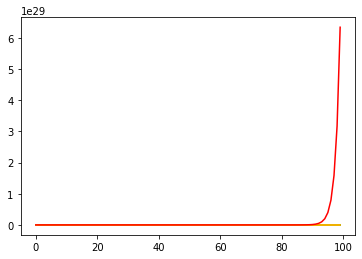

In [ ]:
import matplotlib.pyplot as plt
from numpy import linspace, log2

n     = 100
passo = 1
x = range(n)#linspace(1, passo, n)

T_logn  = [log2(i) for i in x]
T_n     = x
T_nlogn = [i*log2(i) for i in x]
T_n2    = [i**2 for i in x]
T_n3    = [i**3 for i in x]
T_2n    = [2**i for i in x]

plt.plot(x, T_logn, 'black')
plt.plot(x, T_n, 'blue')
plt.plot(x, T_nlogn, 'green')
plt.plot(x, T_n2, 'yellow')
plt.plot(x, T_n3, 'orange')
plt.plot(x, T_2n, 'red')

# Exemplos recorrentes

## **Exemplo 5**: Calcule a quantidade total de atribuições dos algoritmos a seguir e destaque sua ordem de complexidade de acordo com o termo dominante de sua função de quantidade total de atribuições.

In [ ]:
def f1(n):

    soma = 0 # 1 at
    for i in range(n): # n elementos na varredura
        soma = soma + i # n at

    for i in range(n):
        soma = soma - i/2 # n at

    return soma

# T(n) = 2n + 1
# O(T(n)) = O(f1) = O(n)

In [ ]:
def f2(n):

    soma = 0 # 1 at
    for i in range(n): # n elementos
        soma = soma + i # n at

        for j in range(n): # n elementos
            soma = soma - j/2 # (n at)*n = n² atribuições

    return soma

# T(n) = n² + n + 1
# O(f2) = O(n²)

In [ ]:
def f3(n):

    soma = 0 # 1 at
    for i in range(n): # n elementos
        soma = soma + i # n atribuições
        if i > 5: # bloco com mais atribuições
          soma = soma + 2*i  # n at
          soma = soma / 2    # n at
          soma = soma - 2**i # n at
        elif i < 10:
          soma = soma + 3*i
          soma = soma * 2
        else:
          soma = soma / 2

    return soma

# T(n) = 4n + 1
# O(f3) = O(n)

In [ ]:
def f4(n):

    soma  = 0 # 1 at
    i     = n # 1 at
    while i > 1:
        soma = soma + i # numpy.floor(log(n)) atribuições
        i    = i // 2 # Divisão inteira (i = numpy.floor(i/2)). Ex.: 5//2 resultará em 2
                       # numpy.floor(log(n)) atribuições

    return soma

# T(n) = 2*numpy.floor(log(n)) + 2
# O(f4) = O(log(n))

| n | Variações do ```i``` | Quantidades de repetições | Limites de n definidos pelas potências de 2
| :- | -: | :-: | :-: |
| 17 | [17,8,4,2,1] | 4 | Entre $2^4$ e $2^5$
| 16 | [16,8,4,2,1] | 4 | Entre $2^3$ e $2^4$
| 15 | [15,7,3,1] | 3 | Entre $2^3$ e $2^4$
| 14 | [14,7,3,1] | 3 | Entre $2^3$ e $2^4$
| 13 | [13,6,3,1] | 3 | Entre $2^3$ e $2^4$
| 12 | [12,6,3,1] | 3 | Entre $2^3$ e $2^4$
| 11 | [11,5,2,1] | 3 | Entre $2^3$ e $2^4$
| 10 | [10,5,2,1] | 3 | Entre $2^3$ e $2^4$
| 9 | [9,4,2,1] | 3 | Entre $2^3$ e $2^4$
| 8 | [8,4,2,1] | 3 | Entre $2^2$ e $2^3$
| 7 | [7,3,1] | 2 | Entre $2^2$ e $2^3$
| 6 | [6,3,1] | 2 | Entre $2^2$ e $2^3$
| 5 | [5,2,1] | 2 | Entre $2^2$ e $2^3$
| 4 | [4,2,1] | 2 | Entre $2^1$ e $2^2$
| 3 | [3,1] | 1 | Entre $2^1$ e $2^2$
| 2 | [2,1] | 1 | Entre $2^1$ e $2^2$

In [ ]:
def f5(n):

    soma  = 0 # 1 at
    for j in range(n):
        i = n # n at
        while i > 1:
            soma = soma + i # n*numpy.floor(log(n)) atribuições
            i    = i // 2   # n*numpy.floor(log(n)) atribuições

    return soma

# T(n) = 2*n*numpy.floor(log(n)) + n + 1
# O(f5) = O(nlog(n))

In [ ]:
def f6(n):

    soma  = 0 # 1
    for k in range(n):
        for j in range(n):
            i     = n # n²
            # ------------------------------------------------------------------
            #  O(n log(n))
            # ------------------------------------------------------------------
            while i > 1:
                soma = soma + i # n²*numpy.floor(log(n))
                i    = i // 2   # n²*numpy.floor(log(n))
        #-----------------------------------------------------------------------

    return soma

# T(n) = 2*n²*numpy.floor(log(n)) + n² + 1
# O(f6) = O(n²log(n))

In [ ]:
def f7(n):
  result = 0 # 1 at
  for i in range(n):
    result = result + i # n at

  return result
# T_f7(n) = n + 1
# O(f7) = O(n)

def f8(n):

  soma = 0 # 1 at
  for i in range(1, n):
    soma = soma + f7(i) # n*(n + 1) at

  return soma
# T_f8(n) = n*(n + 1) = n² + n + 1
# O(f8) = O(n²)

In [ ]:
def f9(n):
    result = 0 # 1 at
    for i in range(n): # n elementos
      for j in range(i+1): # i+1 elementos
        result = result + 3 #  (n/2)*(n+1) = n²/2 + n/2
    return result

# T(n) = n²/2 + n/2 + 1
# O(f9) = O(n²)

| Valor de ```i``` | Valores de ```j``` | Quantidades de repetições no segundo laço de repetição for
| :- | -:   |-: |
| 0 | [0]   | 1 |
| 1 | [0,1] | 2 |
| 2 | [0,1,2] | 3 |
| $\vdots$ | $\vdots$ | $\vdots$ |
| n-1 | [0, 1, 2, ..., n-1] | n |

**Total de repetições:**

Se $n$ for par:


Exemplo: $1+2+3+4+5+6 = (6+1) + (5+2) + (4 + 3)$

<br/>
$$1 + 2 + 3 + ... + (n-2) + (n-1) + n = (n+1) + [(n-1)+2] + [(n-2) + 3] + ... + \left[\frac{n}{2} + \left(\frac{n}{2}+1\right)\right]  = \frac{n}{2}(n+1). $$

<br/>
Se $n$ for ímpar:

Exemplo: $1+2+3+4+5 = (5+1) + (4+2) + 3$

<br/>
$$ 1 + 2 + 3 + ... + (n-2) + (n-1) + n  = (n+1) + [(n-1)+2] + [(n-2) + 3] + ... + \frac{n+1}{2} = \frac{n-1}{2}(n+1) + \frac{n+1}{2} = \frac{n+1}{2}[(n-1) + 1] = \frac{n}{2}(n+1). $$

Ambos os casos, temos que a soma $1+2+3+...+n$ é igual a $\frac{n}{2}(n+1)$.